# Intro

Ready for a quick test of your logic and programming skills?

In today's micro-challenge, you will write the logic for a blackjack playing program.  Our dealer will test your program by playing 50,000 hands of blackjack. You'll see how frequently your program won, and you can discuss how your approach stacks up against others in the challenge.

![Blackjack](http://www.hightechgambling.com/sites/default/files/styles/large/public/casino/table_games/blackjack.jpg)

# Blackjack Rules

We'll use a slightly simplified version of blackjack (aka twenty-one). In this version, there is one player (who you'll control) and a dealer. Play proceeds as follows:

- The player is dealt two face-up cards. The dealer is dealt one face-up card.
- The player may ask to be dealt another card ('hit') as many times as they wish. If the sum of their cards exceeds 21, they lose the round immediately.
- The dealer then deals additional cards to himself until either:
    - The sum of the dealer's cards exceeds 21, in which case the player wins the round, or
    - The sum of the dealer's cards is greater than or equal to 17. If the player's total is greater than the dealer's, the player wins. Otherwise, the dealer wins (even in case of a tie).

When calculating the sum of cards, Jack, Queen, and King count for 10. Aces can count as 1 or 11. (When referring to a player's "total" above, we mean the largest total that can be made without exceeding 21. So A+8 = 19, A+8+8 = 17.)

# The Blackjack Player
You'll write a function representing the player's decision-making strategy. Here is a simple (though unintelligent) example.

**Run this code cell** so you can see simulation results below using the logic of never taking a new card.

In [1]:
def should_hit(player_total, dealer_card_val, player_aces):
    """Return True if the player should hit (request another card) given the current game
    state, or False if the player should stay. player_aces is the number of aces the player has.
    """
    return False

We'll simulate games between your player agent and our own dealer agent by calling your function. So it must use the name `should_hit`.

# The Blackjack Simulator

Run the cell below to set up our simulator environment:

In [2]:
# SETUP. You don't need to worry for now about what this code does or how it works. 
# If you're curious about the code, it's available under an open source license at https://github.com/Kaggle/learntools/
from learntools.core import binder; binder.bind(globals())
from learntools.python.ex3 import q7 as blackjack
# Returns a message "Sorry, no auto-checking available for this question." (You can ignore.)
blackjack.check()
print('Setup complete.')

<IPython.core.display.Javascript object>

<span style="color:#cc5533">Sorry, no auto-checking available for this question.</span>

Setup complete.


Once you have run the set-up code, you can see the action for a single game of blackjack with the following line:

In [3]:
blackjack.simulate_one_game()

Player starts with 9 and K (total = 19)
Dealer starts with K

__Player's turn__
Player stays

__Dealer's turn__
Dealer hits and receives 2. (total = 12)
Dealer hits and receives Q. (total = 22)
Dealer busts! Player wins.


You can see how your player does in a sample of 50,000 games with the following command:

In [4]:
blackjack.simulate(n_games=50000)

Player won 19063 out of 50000 games (win rate = 38.1%)


# Your Turn

Write your own `should_hit` function in the cell below. Then run the cell and see how your agent did in repeated play.
Return `True` if the player should hit (request another card) given the current game state, or `False` if the player should stay. player_aces is the number of aces the player has.

<h1>First Attempt :</h1>

Let's try by simply hit only if the cards received are maximum 13.

In [8]:
def should_hit(player_total, dealer_card_val, player_aces):
    
    if player_total < 14:
        return True
    else:
        return False

blackjack.simulate(n_games=50000)

Player won 20960 out of 50000 games (win rate = 41.9%)


<h1>Second Attempt :</h1>

following the advice of https://www.blackjackclassroom.com/blackjack-tips.

return True when :
    - Your hand value is a soft 13 or 14 and the dealer has a 5 or 6.
    - Your hand value is a soft 15 or 16 and the dealer has a 4, 5, or 6.
    - Your hand value is a soft 17 or 18 and the dealer has a value of 3 to 6.
    - Your hand value is 9 and the dealer’s card value is between 2 and 8.
    - Your hand value is 10 and the dealer’s card value is 9 or lower.
    - Your hand value is 11 and the dealer has an Ace or a 10-value card.
    - Also play hit if the card received are maximum 13

In [9]:
init_game = []

def should_hit(player_total, dealer_card_val, player_aces):

    if player_total > 12 and player_total < 15 and player_aces > 0 and dealer_card_val > 4 and dealer_card_val < 7:
        init_game.append(1)
        return True

    elif player_total > 14 and player_total < 17 and player_aces > 0 and dealer_card_val > 3 and dealer_card_val < 7:
        init_game.append(1)
        return True

    elif player_total > 16 and player_total < 19 and player_aces > 0 and dealer_card_val > 2 and dealer_card_val < 7:
        init_game.append(1)
        return True

    elif player_total == 9 and dealer_card_val > 1 and dealer_card_val < 9:
        init_game.append(1)
        return True

    elif player_total == 10 and dealer_card_val <= 9:
        init_game.append(1)
        return True

    elif player_total == 11 and dealer_card_val > 9:
        init_game.append(1)
        return True

    elif player_total < 14:
        return True

    else:
        init_game.clear()
        return False

blackjack.simulate(n_games=50000)

Player won 20744 out of 50000 games (win rate = 41.5%)


<h1>Third Attempt :</h1>

following the advice of https://www.888casino.com/blog/blackjack-strategy/best-blackjack-strategies

return True when :
    - ALWAYS DOUBLE DOWN ON A HARD 11
    - ALWAYS HIT A HARD 12 AGAINST A DEALER’S 2 OR 3 UPCARD
    - ALWAYS HIT ACE-7 (SOFT 18) WHEN THE DEALER’S UPCARD IS 9, 10, OR ACE
    - ALWAYS DOUBLE DOWN ON 10 WHEN THE DEALER’S UPCARD IS 9 OR LESS
    - ALWAYS DOUBLE DOWN A-2 THROUGH A-7 WHEN THE DEALER’S UPCARD IS A 5 OR 6
    - ALWAYS STAND WITH A PAIR OF 9s WHEN THE DEALER’S UPCARD IS A 7
    - ALWAYS SURRENDER HARD 16 AGAINST A DEALER’S 9, 10, OR ACE UPCARD, AND HARD 15 AGAINST DEALER’S 10 UPCARD
    - STAND ON HARD 16 AGAINST A DEALER’S 10 UPCARD IF YOUR 16 IS MULTI-CARD

In [72]:
init_game = []

def should_hit(player_total, dealer_card_val, player_aces):

    if player_total >= 17 and player_total > dealer_card_val:
        init_game.clear()
        return False
    
    elif player_total == 11 and player_aces == 0:
        init_game.clear()
        return False

    elif player_total == 12 and player_aces == 0 and len(init_game) <= 1:
        init_game.append(1)
        return True

    elif player_total == 18 and player_aces > 0 and dealer_card_val >= 9 and dealer_card_val <= 10:
        init_game.append(1)
        return True

    elif player_total == 10 and dealer_card_val >= 9 and dealer_card_val <= 10:
        init_game.clear()
        return False

    elif player_total == 12 or player_total == 3 or player_total == 8 or player_total == 17 and player_aces >0 and dealer_card_val >= 5 and dealer_card_val <= 6:
        init_game.clear()
        return False

    elif player_total == 18 and player_aces == 0 and dealer_card_val == 7:
        init_game.clear()
        return False

    elif player_total == 16 and player_aces == 0 and dealer_card_val >= 9 and dealer_card_val <= 10:
        init_game.clear()
        return False

    elif player_total == 16 and dealer_card_val == 10:
        init_game.clear()
        return False

    elif player_total < 14:
        return True

    else:
        init_game.clear()
        return False


i = 0
for i in range(10):
    blackjack.simulate(n_games=50000)

Player won 19845 out of 50000 games (win rate = 39.7%)
Player won 19913 out of 50000 games (win rate = 39.8%)
Player won 19711 out of 50000 games (win rate = 39.4%)
Player won 20042 out of 50000 games (win rate = 40.1%)
Player won 19765 out of 50000 games (win rate = 39.5%)
Player won 19810 out of 50000 games (win rate = 39.6%)
Player won 19896 out of 50000 games (win rate = 39.8%)
Player won 19758 out of 50000 games (win rate = 39.5%)
Player won 19707 out of 50000 games (win rate = 39.4%)
Player won 19816 out of 50000 games (win rate = 39.6%)


<h1>Forth Attempt :</h1>

following the advice of https://wizardofodds.com/games/blackjack/strategy/4-decks/.

    - Always hit hard 11 or less.
    - Stand on hard 12 against a dealer 4-6, otherwise hit.
    - Stand on hard 13-16 against a dealer 2-6, otherwise hit.
    - Always stand on hard 17 or more.
    - Always hit soft 17 or less.
    - Stand on soft 18 except hit against a dealer 9, 10, or A.
    - Always stand on soft 19 or more.
    - Surrender 15, a pair of 8s, and 17 vs. dealer A.
    - Double 11 vs. dealer A.
    - Double soft 18 vs. dealer 2.
    - Double soft 19 vs. dealer 6.



In [70]:
init_game = []

def should_hit(player_total, dealer_card_val, player_aces):

    if player_total >= 17 and player_total > dealer_card_val:
        init_game.clear()
        return False
    
    elif player_total <= 11:
        init_game.append(1)
        return True

    elif player_total == 12 and player_aces == 0 and dealer_card_val >= 4 and dealer_card_val <= 6:
        init_game.clear()
        return False

    elif player_total >= 13 and player_total <= 16 and player_aces == 0 and dealer_card_val >= 2 and dealer_card_val <= 6:
        init_game.clear()
        return False

    elif player_total == 17 and player_aces == 0:
        init_game.clear()
        return False

    elif player_total <= 17 and player_aces > 0:
        init_game.append(1)
        return True

    elif player_total == 18 and player_aces > 0 and dealer_card_val != 9 and dealer_card_val != 10:
        init_game.append(1)
        return True
    
    elif player_total == 19 and player_aces > 0:
        init_game.clear()
        return False
    
    elif player_total >= 15 and player_total <=17 and dealer_card_val == 10:
        init_game.clear()
        return False
    
    elif player_total == 11 and player_aces > 0 and dealer_card_val == 10:
        init_game.clear()
        return False
    
    elif player_total == 18 and player_aces > 0 and dealer_card_val == 2:
        init_game.clear()
        return False

    elif player_total == 19 and player_aces > 0 and dealer_card_val == 6:
        init_game.clear()
        return False

    else:
        init_game.clear()
        return False


i = 0
for i in range(10):
    blackjack.simulate(n_games=50000)

Player won 21067 out of 50000 games (win rate = 42.1%)
Player won 21218 out of 50000 games (win rate = 42.4%)
Player won 20922 out of 50000 games (win rate = 41.8%)
Player won 20966 out of 50000 games (win rate = 41.9%)
Player won 21071 out of 50000 games (win rate = 42.1%)
Player won 21039 out of 50000 games (win rate = 42.1%)
Player won 20866 out of 50000 games (win rate = 41.7%)
Player won 20788 out of 50000 games (win rate = 41.6%)
Player won 21096 out of 50000 games (win rate = 42.2%)
Player won 20974 out of 50000 games (win rate = 41.9%)


<h1>Fifth Attempt :</h1>

![table_info](https://wizardofodds.com/blackjack/images/bj_4d_s17.gif)
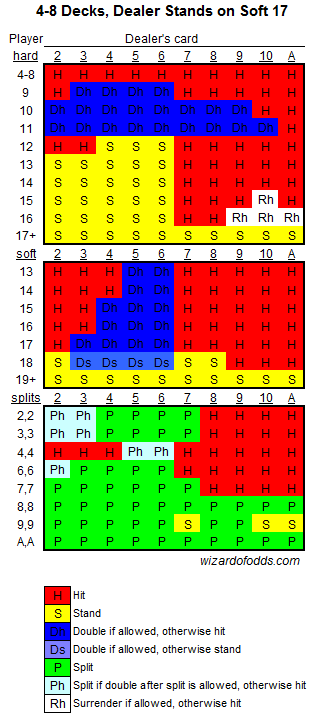

In [69]:
init_game = []

def should_hit(player_total, dealer_card_val, player_aces):
    

    if player_total >= 17 and player_total > dealer_card_val:
        init_game.clear()
        return False
    
    # soft :
    
    elif player_total >= 13 and player_total <= 17 and player_aces > 0:
        init_game.append(1)
        return True
    
    elif player_total == 18 and player_aces > 0 and dealer_card_val >= 9:
        init_game.append(1)
        return True
    
    # Hard :

    elif player_total <= 11 and player_aces == 0:
        init_game.append(1)
        return True
    
    elif player_total == 12 and player_aces == 0 and dealer_card_val <= 3:
        init_game.append(1)
        return True
    
    elif player_total >= 17 and player_aces == 0:
        init_game.clear()
        return False

    elif player_total >= 12 and player_aces == 0 and dealer_card_val <= 6:
        init_game.clear()
        return False

    
    else:
        init_game.clear()
        return False

i = 0
for i in range(10):
    blackjack.simulate(n_games=50000)

Player won 20745 out of 50000 games (win rate = 41.5%)
Player won 20580 out of 50000 games (win rate = 41.2%)
Player won 21007 out of 50000 games (win rate = 42.0%)
Player won 21058 out of 50000 games (win rate = 42.1%)
Player won 20835 out of 50000 games (win rate = 41.7%)
Player won 20906 out of 50000 games (win rate = 41.8%)
Player won 20984 out of 50000 games (win rate = 42.0%)
Player won 20864 out of 50000 games (win rate = 41.7%)
Player won 21038 out of 50000 games (win rate = 42.1%)
Player won 20914 out of 50000 games (win rate = 41.8%)


---
This exercise is from the **[Python Course](https://www.kaggle.com/Learn/python)** on Kaggle Learn.

Check out **[Kaggle Learn](https://www.kaggle.com/Learn)**  for more instruction and fun exercises.